# Projeto 2

In [1]:
from platform import python_version
print("Versão da Linguagem Python Usada", python_version())
!python -V

Versão da Linguagem Python Usada 3.8.5
Python 3.8.5


In [2]:
!pip install -q -U watermark

In [3]:
!pip install -q missingno

In [4]:
!pip install -q category_encoders

In [5]:
!pip install -q plotly

In [6]:
#Imports

#Manipulação
import pandas as pd
import numpy as np

#Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

#Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

#Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

#Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [7]:
#Carrega o dataset
df = pd.read_csv("dataset/aug_train.csv")

In [8]:
#Shape - Linhas, Colunas
df.shape

(19158, 14)

In [9]:
# Colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [10]:
# Amostra de dados
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
# Info, bom ponto de partida para ver como os dados estão distribuidos. categoricos ou num.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Análise Exploratória de Dados

In [12]:
# Descrevendo os dados não númericos
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [13]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [14]:
# Entendendo os dados

# Em city_develepment_index (CDI), os valores médios (mean) são 0,828, mediana(média - 50%) 0,903 e
# std (standart deviation) 0,123. Isso significa que a maioria dos candidatos é de cidades bem desenvolvidas
# Indice de desenvolvimento vai de 0 a 1, quanto maior melhor, se a média é 0,829, então muitos estão na cidade desenvolv.

# Em training_hours, os valores médios são 65,367, mediana 47 e max 336. Isso significa que há mais candidatos
# com poucas horas de treinamento, mas alguns candidatos gastam muito tempo para fazer o treinamento

In [15]:
# Visualizando as Variáveis Categóricas

In [16]:
# No info, diz que começa no indice 3, até o indice 11, o 12 é porque não é inclusivo.
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

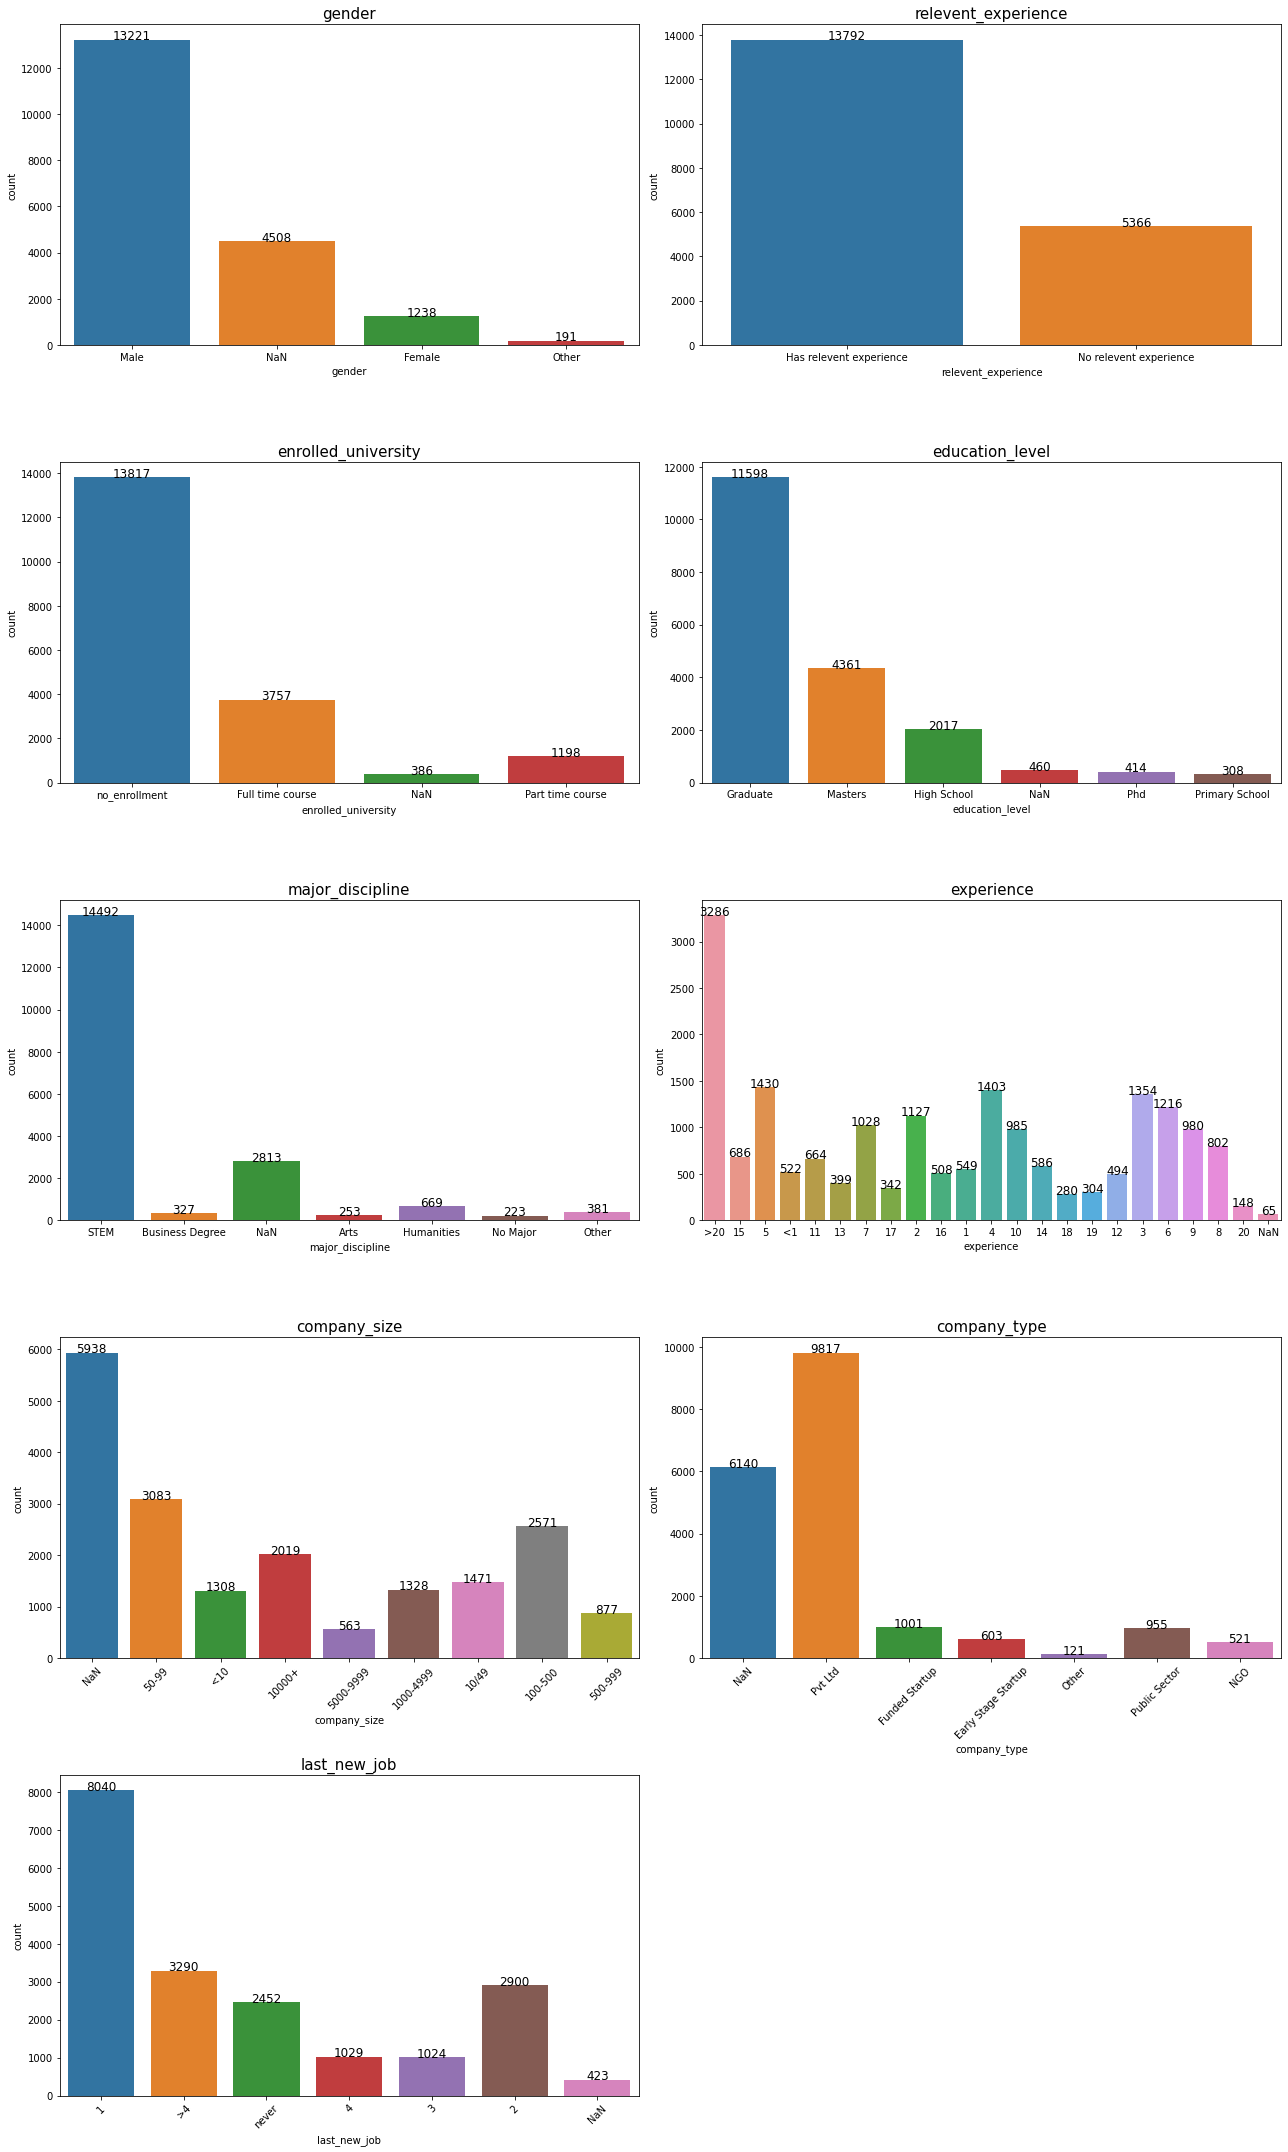

In [17]:
# Plot

# Tamanho da figura - Área de plotagem
plt.figure(figsize=(18,30))

# Lista de Colunas
column_list = list(df.columns.values)[3:12]

#contador
A = 0

# Loop

for i in column_list:
    A +=1
    plt.subplot(5, 2, A)
    ax = sns.countplot(data = df.fillna('NaN'), x = i)
    plt.title(i, fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)
    
# Layout
plt.tight_layout(h_pad = 2)

In [18]:
# Descrevendo os dados numéricos
df.describe().drop(columns = ['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


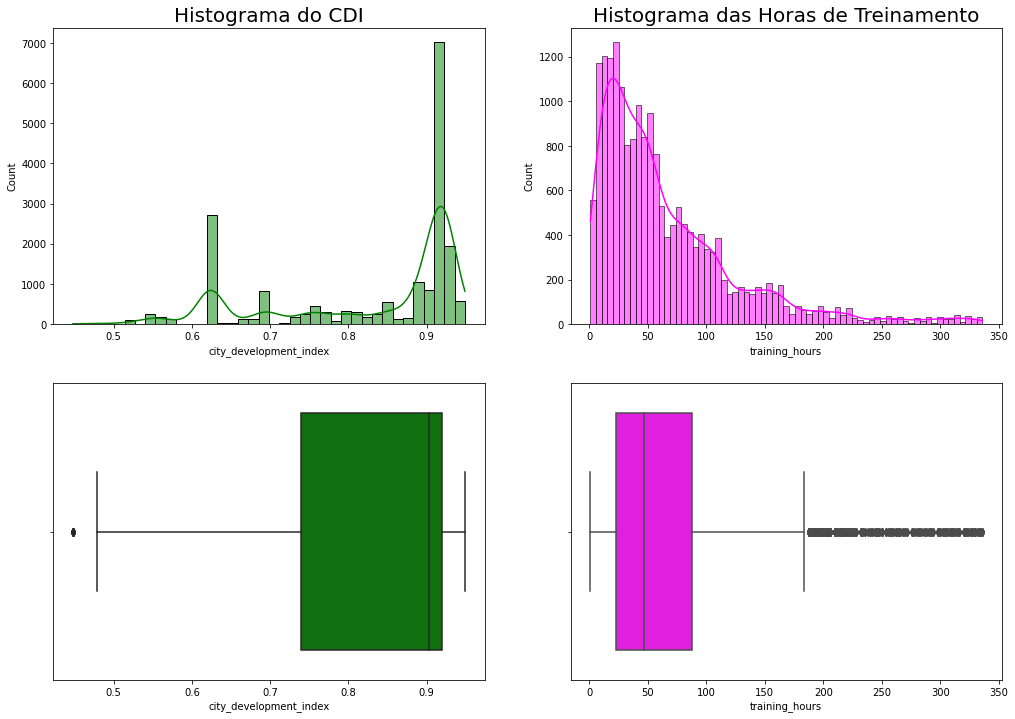

In [19]:
# FIgura - Área de Plot
plt.figure(figsize = (17,12))

#Subplot com histogramas
plt.subplot(221)
sns.color_palette("hls",8)
sns.histplot(df['city_development_index'], kde = True, color = "green") #kde = curva de densidade
plt.title('Histograma do CDI', fontsize = 20)

plt.subplot(222)
sns.histplot(df['training_hours'], kde = True, color = "magenta")
plt.title("Histograma das Horas de Treinamento", fontsize = 20)

#Subplot com boxplots
plt.subplot(223)
sns.boxplot(df['city_development_index'], color = "green")

plt.subplot(224)
sns.boxplot(df['training_hours'], color = "magenta")

plt.show()

## SEMPRE QUE TRABALHAR COM VARIÁVEIS NÚMERICAS VERIFICAR A "NORMALIDADE"

## Outliners são valores totalmente fora da curva, no boxplot, são pontos fora do boxplot

In [20]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['city_development_index','training_hours']

# Loop
# Função normaltest do scipy

for i in numerical_feature:
    
    # Calcula a normalidade
    # Normaltest aplica um teste de hipótese
    stats, pval = normaltest(df[i])
    
    #Checar valor-p
    # Convenção de p >0.05 é distribuição normal
    if pval > 0.05:
        print (i, ': Distriuição Normal')
    else:
        print (i, ': Distribuição Não Normal')

city_development_index : Distribuição Não Normal
training_hours : Distribuição Não Normal


As variáveis city_development_index e training_hours não seguem a distribuição normal. Para a análise numérica, usaremos o método não paramétrico.

Dados de training_hours estão localizados principalmente no lado esquerdo do histograma. É um comportamento esperado porque as pessoas geralmente ficam animadas ao fazer o treinamento no início, mas nem todos que começa conseguem terminar uma maratona.

## Correlação dos Dados

Correlação de Spearman Entre Variáveis Numéricas

Analisamos a correlação entre as variáveis numéricas e entre ase a variável alvo ( o que estamos querendo analisar)

In [21]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [22]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [23]:
# Criamos uma cópia do dataframe original
df_numerical = df.copy()

In [24]:
# contar os elementos únicos
df_numerical["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [25]:
# Converter a variável experience para numérica, será que da para fazer o hot-one-encoding por esse metodo
df_numerical['experience'] = np.where(df_numerical["experience"] == "<1", 1,df_numerical['experience'])
df_numerical['experience'] = np.where(df_numerical['experience'] == ">20", 21, df_numerical['experience'])
df_numerical['experience'] = df_numerical['experience'].astype(float)

In [26]:
df_numerical['experience'].value_counts()

21.0    3286
5.0     1430
4.0     1403
3.0     1354
6.0     1216
2.0     1127
1.0     1071
7.0     1028
10.0     985
9.0      980
8.0      802
15.0     686
11.0     664
14.0     586
16.0     508
12.0     494
13.0     399
17.0     342
19.0     304
18.0     280
20.0     148
Name: experience, dtype: int64

In [27]:
df_numerical['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [28]:
# Converter a variável last_new_job para numérica
df_numerical['last_new_job'] = np.where(df_numerical['last_new_job'] == "never",0, df_numerical['last_new_job'])
df_numerical['last_new_job'] = np.where(df_numerical['last_new_job'] == ">4", 5, df_numerical['last_new_job'])
df_numerical['last_new_job'] = df_numerical['last_new_job'].astype(float)

In [29]:
df_numerical['last_new_job'].value_counts()

1.0    8040
5.0    3290
2.0    2900
0.0    2452
4.0    1029
3.0    1024
Name: last_new_job, dtype: int64

In [30]:
df_numerical.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,1.0,NaN,Pvt Ltd,0.0,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0


In [31]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(4), int64(2), object(8)
mem

In [32]:
df_numerical.drop("enrollee_id",axis = 1).corr("spearman")

,city_development_index,experience,last_new_job,training_hours,target
city_development_index,1.000000,0.300997,0.182698,0.007491,-0.279165
experience,0.300997,1.000000,0.473284,0.003569,-0.183721
last_new_job,0.182698,0.473284,1.000000,0.002959,-0.082045
training_hours,0.007491,0.003569,0.002959,1.000000,-0.014126
target,-0.279165,-0.183721,-0.082045,-0.014126,1.000000


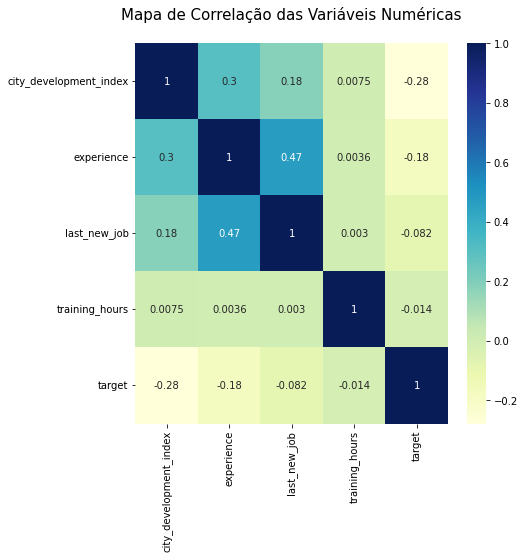

In [33]:
# Heatmap

plt.figure(figsize = (7,7))
sns.heatmap(df_numerical.drop("enrollee_id", axis = 1).corr("spearman"), annot = True, cmap ="YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Pela correlação de Spearman, last_new_job e experience têm correlação média (0,473), enquanto outros têm correlação fraca.

As variaveis last_new_job e training_hours são tão proximas de zero, que podem ser desconsideradas.

Para a relação entre as ariáveis categóricas e a variável alvo, usaremos WOE e IV.

## Weight of Evidence (WOE) e Information Value (IV)

Este conjunto de dados contém mais dados com tipo categórico do que tipo numérico. Usaremos recursos categóricos nominais para WOE e IV.

Information Value, Poder de previsão.

<0.02, não deve ser usado para previsão

0.02 - 0.1, preditor fraco

0.1 - 0.3, preditor médio

0.3 - 0.5, preditor forte

> 0.5, parece bom demais para ser verdade

In [34]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1] - dfx[0]))))
    print(df_woe_iv, '\n------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------
target                0.0       1.0       woe 

<Figure size 720x864 with 0 Axes>

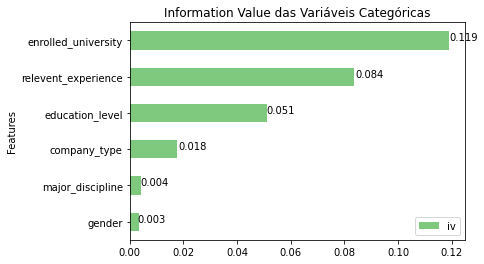

In [35]:
# Plot do information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                    'enrollee_id',
                                    'city',
                                    'city_development_index',
                                    'training_hours',
                                    'experience',
                                    'last_new_job',
                                    'company_size']).columns

# Lista para o IV

iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
    
# Dataframe

df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc = "lower right")
plt.show()

No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
Com base em seu valor IV, enrolled_university é um preditor médio, relevent_experience e education_level são preditores fracos e os outros são inúteis para a previsão

# Identificando Valores Ausentes

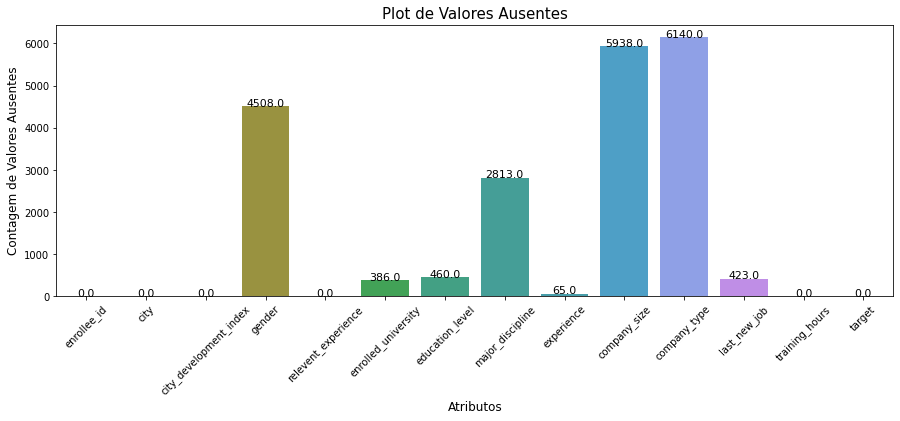

In [36]:
# Valores ausentes por coluna
null_df = df.isna().sum().reset_index()

#Figura
ax = plt.figure(figsize = (15,5))

#Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)
    
plt.show()

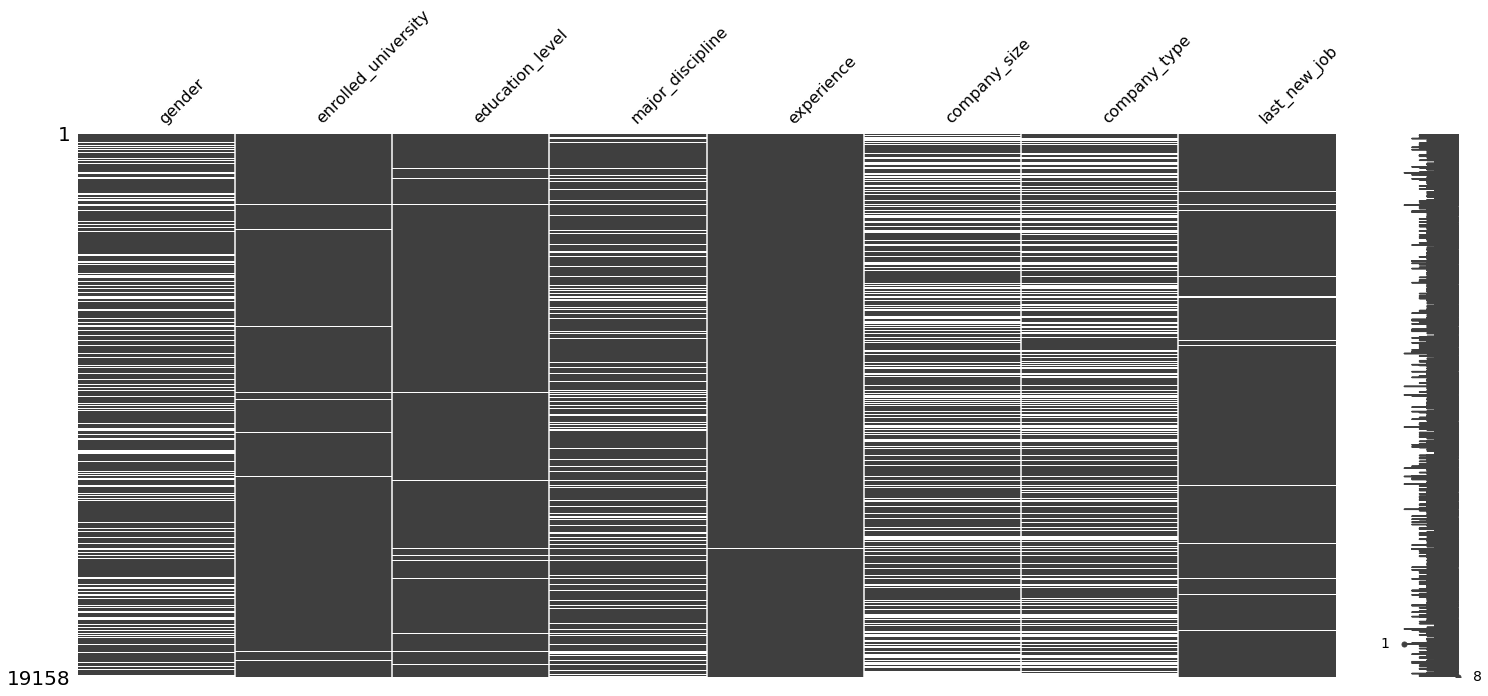

In [37]:
# Gera a visualização

# Dataframe
df_nan = pd.DataFrame(df.isna().sum())

# Plot - Mapa de Valores Ausentes
if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Valores ausentes cada coluna têm um padrão aleatório.

## Identificando Valores Duplicados

In [38]:
# Checando valores duplicados (não há)
df['enrollee_id'].duplicated().sum()

0

## Identificando Dados Desbalenceados

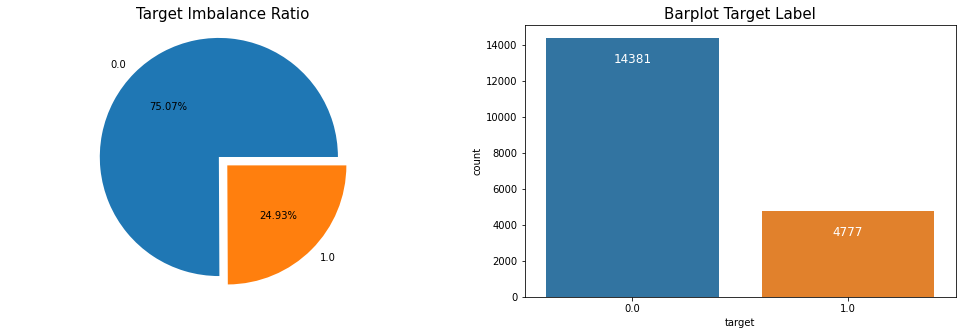

In [39]:
# Figura
plt.figure(figsize = (17,(100/20)))

plt.subplot(121)
plt.pie(round(df['target'].value_counts() / len(df) * 100,2),
       labels = list(df['target'].value_counts().index),
       autopct = "%.2f%%",
       explode = (0,0.1))

plt.axis("equal")
plt.title("Target Imbalance Ratio", size = 15)

plt.subplot(122)
ax = sns.countplot(data = df, x = 'target')
plt.title("Barplot Target Label", fontsize = 15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',
                (p.get_x()+0.4,
                    p.get_height()),
                ha = 'center',
                va = 'top',
                color = 'white',
                size = 12)

Os dados estão desbalanceados em relação a variável target.

## Limpeza e Processamento dos Dados
Em que momento fazemos a limpeza dos dados?

### Tratando os Valores Ausentes

In [40]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [41]:
colunas_manter = ['city_development_index',
                    'experience',
                    'enrolled_university',
                    'relevent_experience',
                    'education_level',
                    'company_type',
                    'major_discipline',
                    'target']

In [44]:
new_df = df[colunas_manter]

In [45]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.920,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


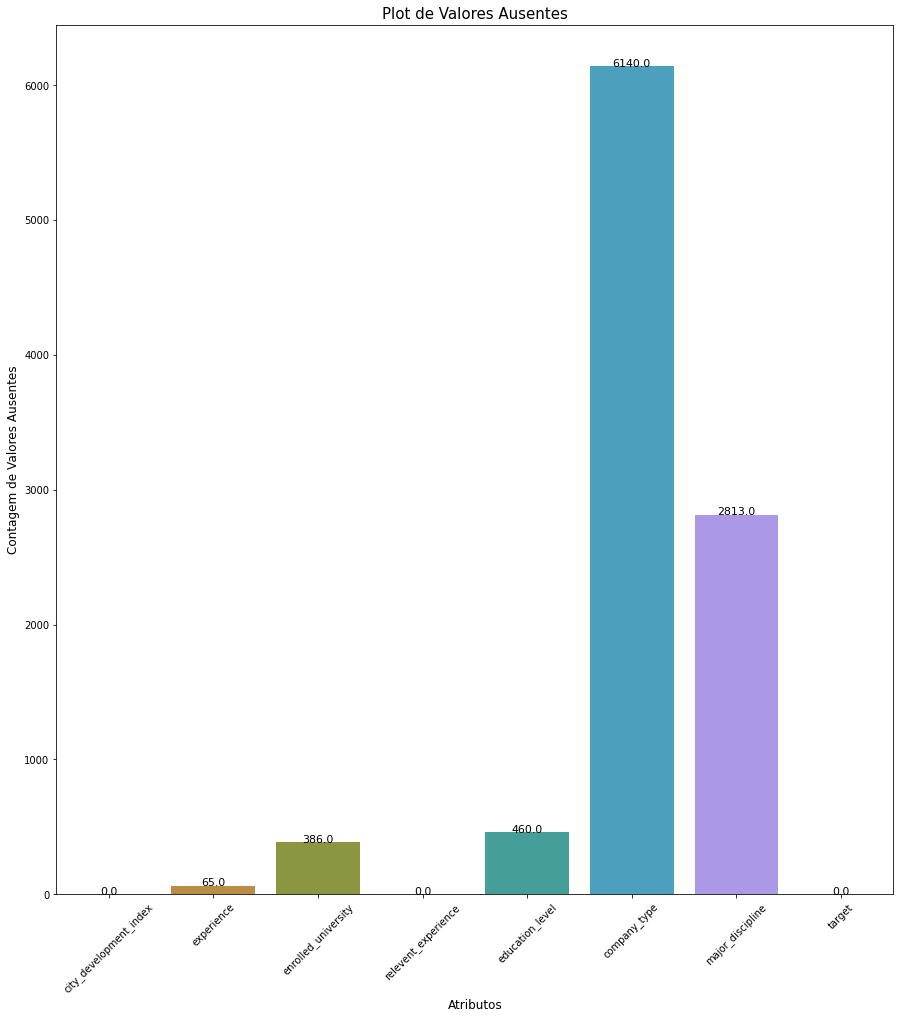

In [47]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,16))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)
    
plt.show()

Variável major_discipline

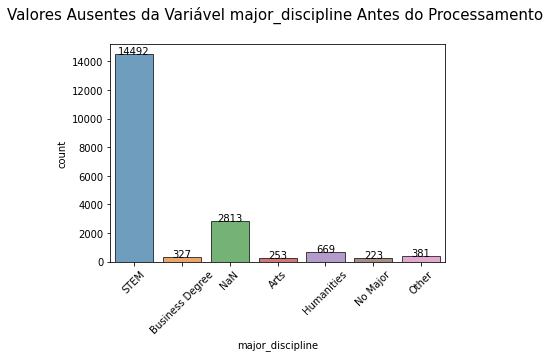

In [49]:
# Valores ausentes da Variável major_discipline Antes do Processamento

sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento \n", fontsize = 15)
plt.show()

In [52]:
# Relação entre major_discipline x education_level
print('\nTotal de Valores Ausentes da Variável major_discipline', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes da Variável major_discipline 2813

Proporção de Valores Ausentes na Variável education_level:


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Dentro os registros com valores ausentes, vemos a proporção na variável education_level.

Preenchermos os valores NA da variável major_discipline com Non Degree.

Se alguém está no "High School" ou "Primary School" não tem como ter diploma, por isso está NaN

In [55]:
#Cria o Indice

nan_index = (df[(df['major_discipline'].isna()) & ((df['education_level'] == "High School") | (df['education_level'].isna()) | (df['education_level'] == "Primary School"))]).index

In [56]:
len(nan_index)

2785

In [57]:
# Imputação do valor ausente
new_df['major_discipline'][nan_index] = 'Non Degree'

In [59]:
print("Total de Valores AUsentes na Variável major_discipline:", new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna = False)

Total de Valores AUsentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

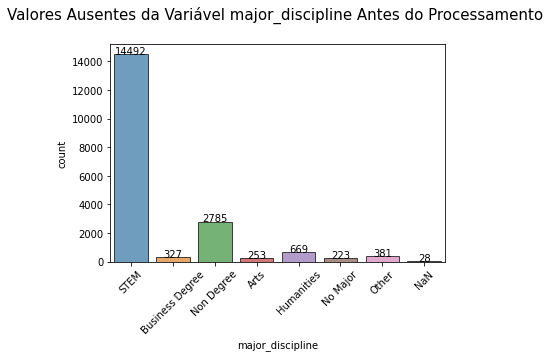

In [60]:
# Valores ausentes da Variável major_discipline Antes do Processamento

sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento \n", fontsize = 15)
plt.show()

In [61]:
# Para os valores ausentes restantes preenchemos com "Other", não tem outro paramentro, então adiciona em um que engloba
# Esse possível valor
new_df[new_df['major_discipline'].isna()] = "Other"

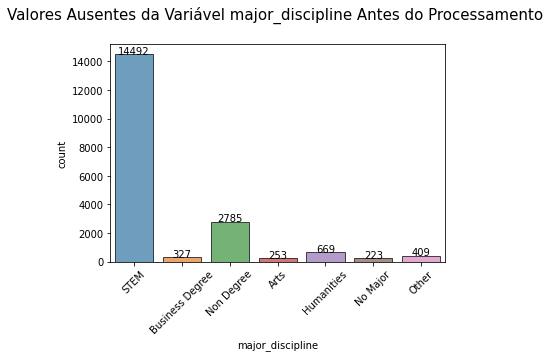

In [62]:
# Valores ausentes da Variável major_discipline Antes do Processamento

sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento \n", fontsize = 15)
plt.show()

In [63]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,NaN,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


Variável enrolled_unversity

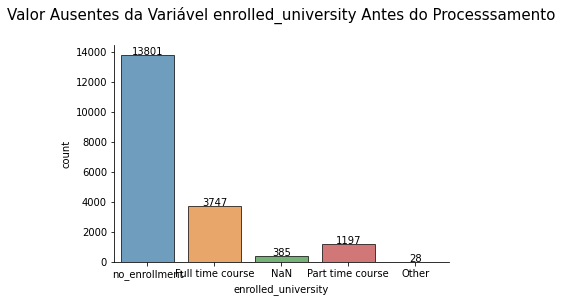

In [67]:
# Plot

sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4,p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valor Ausentes da Variável enrolled_university Antes do Processsamento\n", fontsize= 15)
plt.show()

In [68]:
print("\nTotal de Valores na Variável enrolled_university:", new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes a Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores na Variável enrolled_university: 385

Proporção de Valores Ausentes a Variável education_level:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Candidatos com Primary School como education_level não estão qualificados para ingressar na universidade. Portanto preenchemos valores NaN em education_level para Primary Grad

In [69]:
# Prepara o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level'] == "Primary School")]).index

In [70]:
len(nan_index)

9

In [71]:
# Imputação de valores ausentes
new_df['enrolled_university'][nan_index] = "Primary Grad"

In [73]:
print('Total de valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de valores Ausentes: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [74]:
# Prepara o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [75]:
# O restante colocamos como "Other" porque não tem nenhum critério a se considerar
new_df['enrolled_university'][nan_index] = "Other"

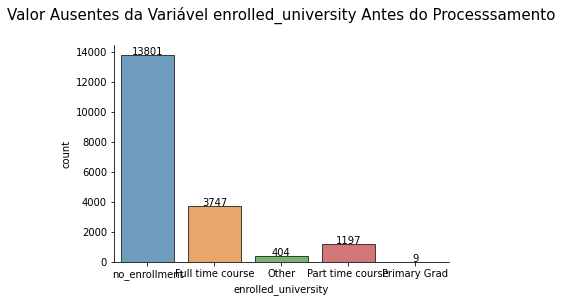

In [76]:
# Plot

sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4,p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valor Ausentes da Variável enrolled_university Antes do Processsamento\n", fontsize= 15)
plt.show()

In [77]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,NaN,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,NaN,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


Variável company_type

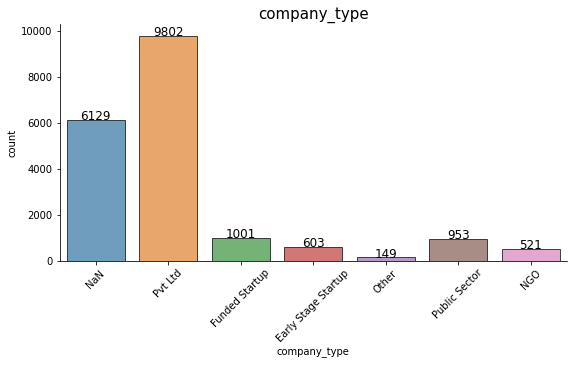

In [78]:
# Plot
plt.figure(figsize = (20,20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna("NaN"), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine()
    plt.title(i,fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size=12)
    if A >= 0:
        plt.xticks(rotation = 45)

In [80]:
df['company_type'].value_counts(dropna = False)

Pvt Ltd                9817
NaN                    6140
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [81]:
# Índice
nan_index = new_df[(new_df['company_type'].isna())].index

In [82]:
# Imputação dos valores NaN com "Other" Não há critério para filtrar
new_df['company_type'][nan_index] = 'Other'

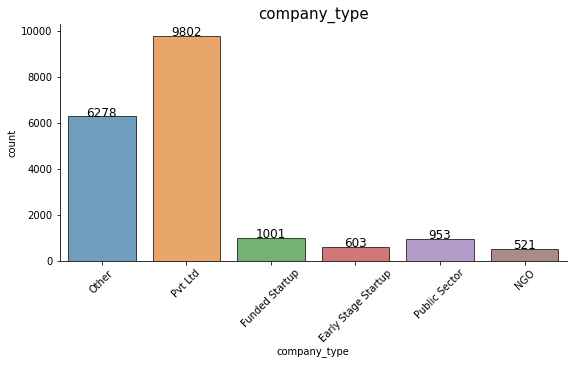

In [83]:
# Plot
plt.figure(figsize = (20,20))
column_list = ['company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data = new_df.fillna("NaN"), x = i, alpha = 0.7, edgecolor = 'black')
    sns.despine()
    plt.title(i,fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size=12)
    if A >= 0:
        plt.xticks(rotation = 45)

In [84]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


Variável education_level

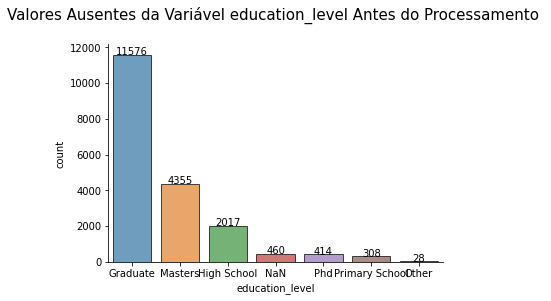

In [86]:
# Plot
sns.countplot(data = new_df.fillna("NaN"), x = "education_level", alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável education_level Antes do Processamento \n", fontsize = 15)
plt.show()

In [87]:
# Índice
nan_index = new_df[(new_df['education_level'].isna())].index

In [88]:
# Imputação dos valores NaN com "Other" Não há critério apenas com os dados
new_df['education_level'][nan_index] = "Other"

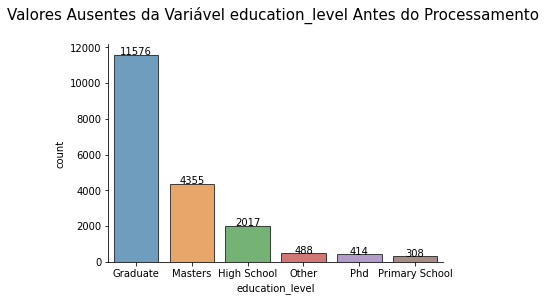

In [89]:
# Plot
sns.countplot(data = new_df.fillna("NaN"), x = "education_level", alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.title("Valores Ausentes da Variável education_level Antes do Processamento \n", fontsize = 15)
plt.show()

Variável experience

In [90]:
new_df['experience'].value_counts(dropna = False)

>20      3281
5        1427
4        1402
3        1351
6        1214
2        1124
7        1028
10        982
9         980
8         802
15        685
11        664
14        586
1         549
<1        520
16        506
12        494
13        399
17        342
19        304
18        279
20        148
NaN        63
Other      28
Name: experience, dtype: int64

In [91]:
# Percentual de alores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

city_development_index    0.000000
experience                0.328844
enrolled_university       0.000000
relevent_experience       0.000000
education_level           0.000000
company_type              0.000000
major_discipline          0.000000
target                    0.000000
dtype: float64

In [92]:
new_df['experience'].isnull().sum()

63

In [93]:
new_df.shape

(19158, 8)

In [94]:
new_df = new_df.dropna()

In [95]:
new_df.shape

(19095, 8)

In [97]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

city_development_index    0.0
experience                0.0
enrolled_university       0.0
relevent_experience       0.0
education_level           0.0
company_type              0.0
major_discipline          0.0
target                    0.0
dtype: float64

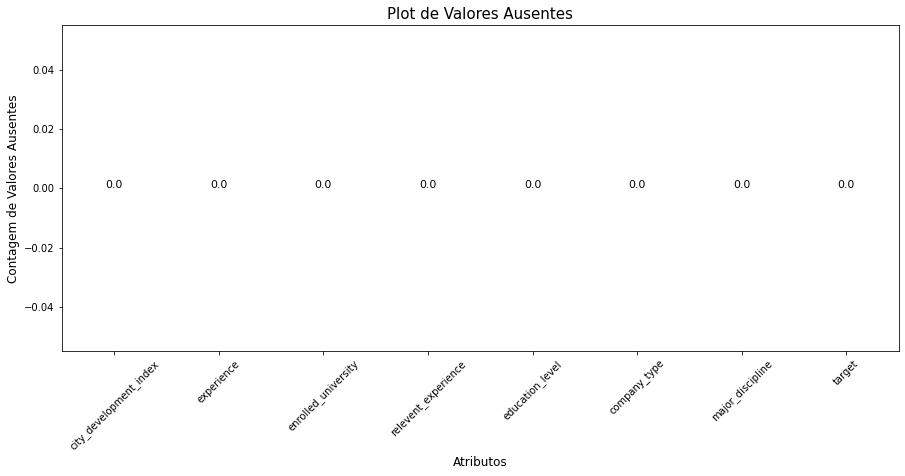

In [99]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel("Atributos", fontsize = 12)
plt.ylabel("Contagem de Valores Ausentes", fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)
    
plt.show()



In [100]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


# Ajustes Finais

In [101]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,no_enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,no_enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,no_enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [102]:
# Ajustando os dados
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [103]:
new_df.head()

,city_development_index,experience,enrolled_university,relevent_experience,education_level,company_type,major_discipline,target
0,0.92,>20,No enrollment,Has relevent experience,Graduate,Other,STEM,1.0
1,0.776,15,No enrollment,No relevent experience,Graduate,Pvt Ltd,STEM,0.0
2,0.624,5,Full time course,No relevent experience,Graduate,Other,STEM,0.0
3,0.789,<1,Other,No relevent experience,Graduate,Pvt Ltd,Business Degree,1.0
4,0.767,>20,No enrollment,Has relevent experience,Masters,Funded Startup,STEM,0.0


In [105]:
x = new_df.drop(columns = ['target'])
y = new_df['target']

# Relatório Final

Com base em nossa análise observamos que as variáveis mais relevantes para identificar um bom candidato são:
   * Índice de Desenvolvimento da cidade onde mora o candidato.
   * Tempo de experiência profissional.
   * Se está ou não matriculado em um curso universitário.
   * Se tem ou não experiência relevante.
   * O nível educacional.
   * O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
   * A especialização na graduação (quando for o caso).
    
Não são relevantes para a análise:
   * O ID do candidato.
   * O código da cidade do candidato.
   * O gênero.
   * A última vez que o candidato esteve empregado.
   * O tamanho da empresa (quando for o caso).
   * Total de horas de treinamento.
    
**Recomendações do Analista de Dados:**
   * O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.
   * O RH pode procurar candidatos que vêm de cidade com índice de desenvolvimento urbano mais baixo, sem experiência releante nível de graduação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.
   * O RH ode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.